In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline

In [2]:
sns.set(style="darkgrid")

In [3]:
gt = pd.read_csv('GlobalTemperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
gt.dropna(inplace = True)
gt.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


In [4]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1992 entries, 1850-01-01 to 2015-12-01
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LandAverageTemperature                     1992 non-null   float64
 1   LandAverageTemperatureUncertainty          1992 non-null   float64
 2   LandMaxTemperature                         1992 non-null   float64
 3   LandMaxTemperatureUncertainty              1992 non-null   float64
 4   LandMinTemperature                         1992 non-null   float64
 5   LandMinTemperatureUncertainty              1992 non-null   float64
 6   LandAndOceanAverageTemperature             1992 non-null   float64
 7   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8)
memory usage: 140.1 KB


In [5]:
gt.dtypes

LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [6]:
gt.index

DatetimeIndex(['1850-01-01', '1850-02-01', '1850-03-01', '1850-04-01',
               '1850-05-01', '1850-06-01', '1850-07-01', '1850-08-01',
               '1850-09-01', '1850-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='dt', length=1992, freq=None)

In [7]:
col = [gt.columns[0], gt.columns[2], gt.columns[4], gt.columns[6]]
col

['LandAverageTemperature',
 'LandMaxTemperature',
 'LandMinTemperature',
 'LandAndOceanAverageTemperature']

In [16]:
groups = gt[col[3]].groupby(pd.Grouper(freq='A'))
LandAndOceanAverageTemperature = pd.DataFrame()
for name, group in groups:
    LandAndOceanAverageTemperature[name.year] = group.values

# LandAndOceanAverageTemperature.columns
LandAndOceanAverageTemperature = LandAndOceanAverageTemperature.transpose()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
LandAndOceanAverageTemperature.columns = months
LandAndOceanAverageTemperature

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1850,12.833,13.588,14.043,14.667,15.507,16.353,16.783,16.718,15.886,14.831,13.897,13.300
1851,13.245,13.331,13.897,14.640,15.771,16.496,16.831,16.621,16.058,15.213,14.161,13.638
1852,13.231,13.311,13.736,14.786,15.899,16.619,16.984,16.566,16.038,15.178,13.948,13.782
1853,13.143,13.362,14.033,14.919,15.793,16.455,16.999,16.789,15.942,14.874,13.829,13.324
1854,12.983,13.248,14.089,14.945,15.793,16.286,16.775,16.707,16.098,15.378,14.123,13.467
...,...,...,...,...,...,...,...,...,...,...,...,...
2011,13.928,14.193,14.880,15.832,16.523,17.203,17.568,17.475,16.762,15.873,14.799,14.198
2012,13.859,14.164,14.863,15.881,16.699,17.252,17.450,17.420,16.882,16.019,15.001,14.138
2013,14.117,14.359,14.952,15.749,16.609,17.257,17.503,17.462,16.894,15.905,15.107,14.339
2014,14.136,14.157,15.090,16.038,16.804,17.303,17.508,17.607,16.975,16.029,14.899,14.410


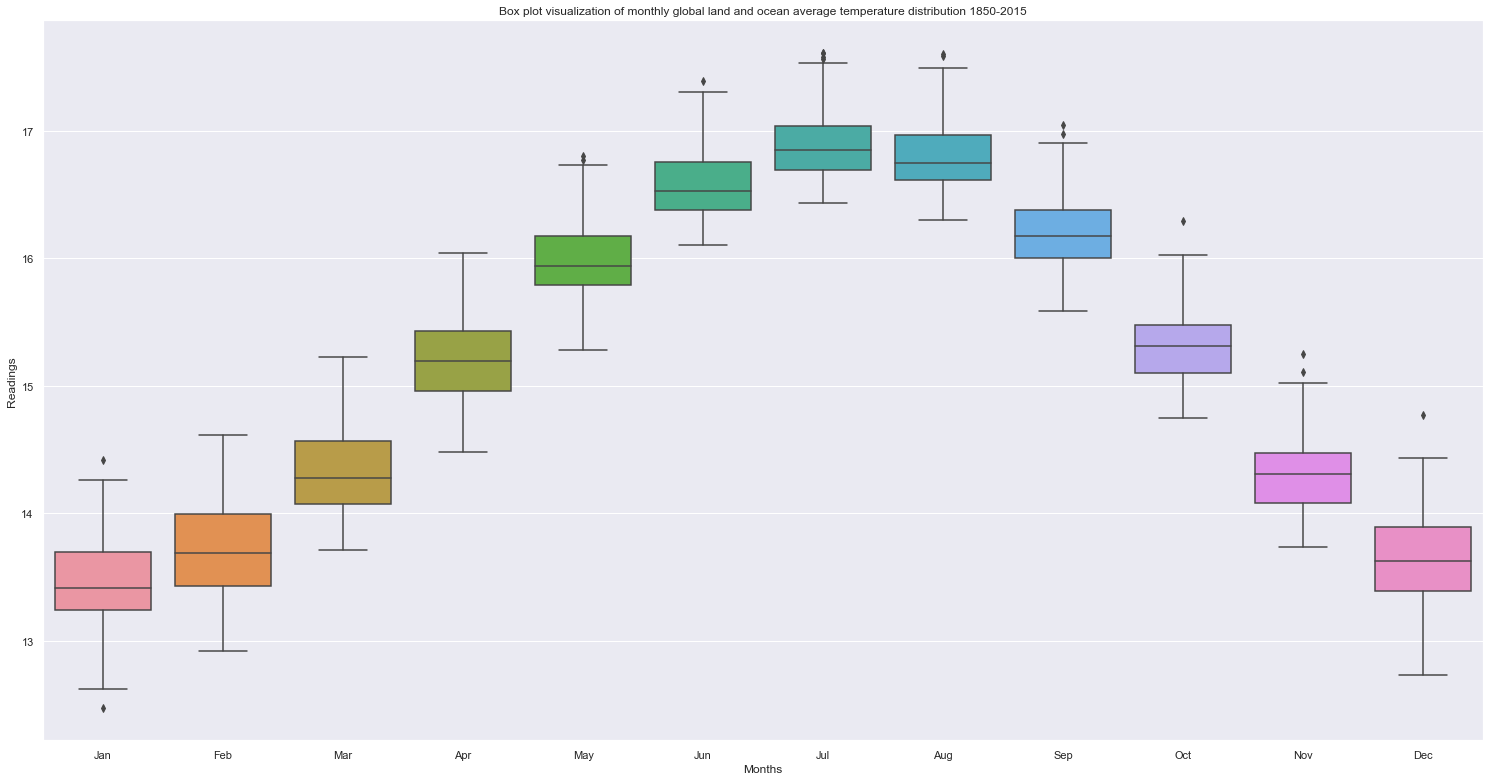

In [17]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_axes([0, 0, 1, 1])
sns.boxplot(x="variable", y="value", data=pd.melt(LandAndOceanAverageTemperature), ax = ax)
ax.set_title('Box plot visualization of monthly global land and ocean average temperature distribution 1850-2015')
ax.set_xlabel('Months')
ax.set_ylabel('Readings')
plt.savefig('monthlyboxplot.png', bbox_inches = 'tight')

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
col2 = gt.columns
col2

Index(['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

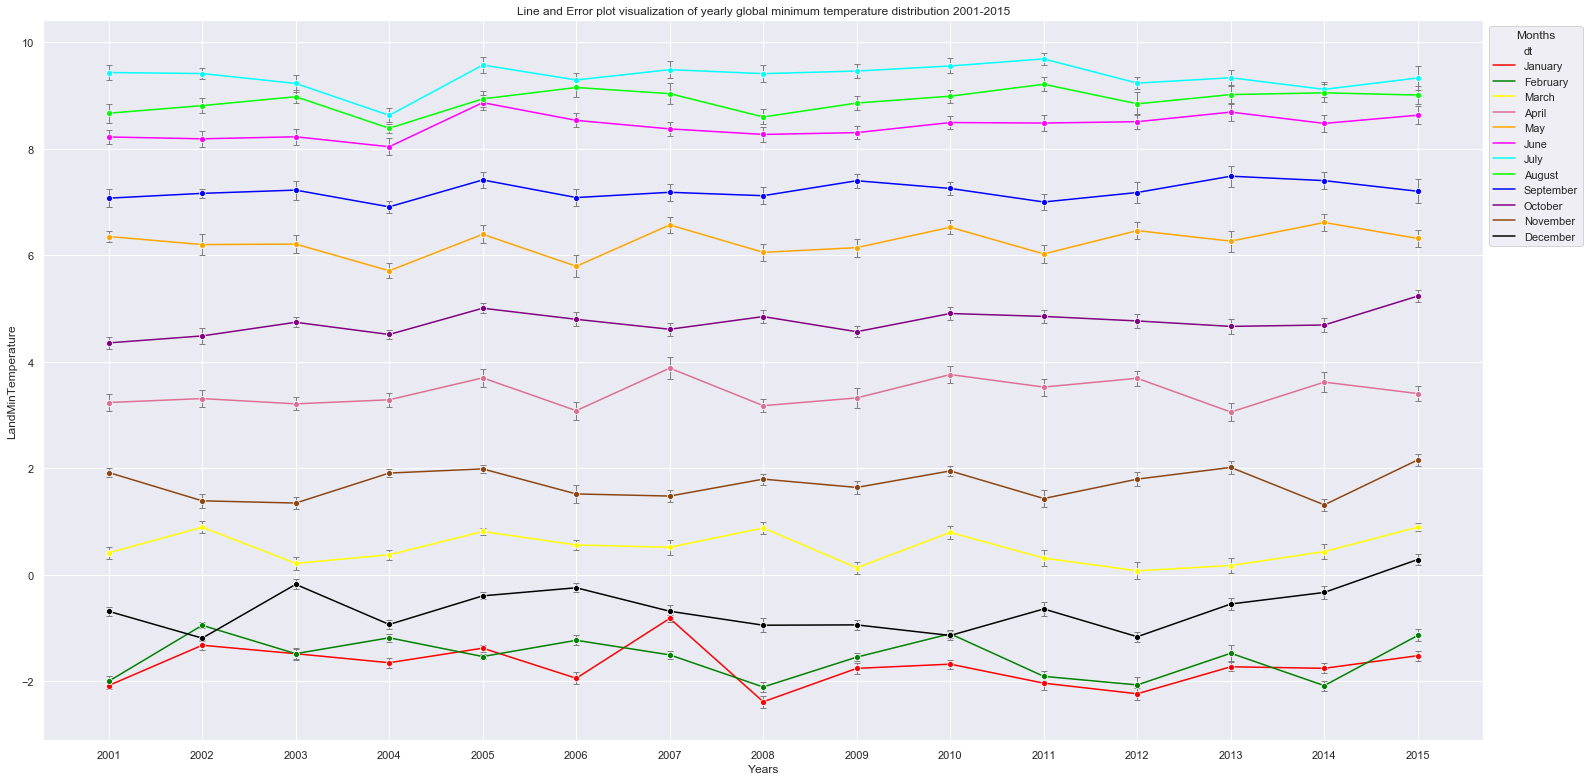

In [45]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_axes([0, 0, 1, 1])
x = gt.index.year[1812:]
y = gt[1812:][col[2]]
dy = gt[1812:][col2[5]]
colors = ['red', 'green', 'yellow', 'palevioletred', 'orange', 'magenta', 'cyan', 'lime', 'blue', 'purple', 'saddlebrown', 'black']
plt.errorbar(x, y, yerr=dy, fmt='none', ecolor='gray', elinewidth=1, capsize=3)
sns.lineplot(x, y, hue=gt.index.month_name()[1812:], marker="o", palette=colors)#, s = 70, ax = ax)
ax.set_title('Line and Error plot visualization of yearly global minimum temperature distribution 2001-2015')
ax.set_xlabel('Years')
ax.set_xticks(x.unique())
plt.legend(title='Months', bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('scatteranderrorplot.png', bbox_inches = 'tight')